<a href="https://colab.research.google.com/github/dthimiri/Projects/blob/main/NetFlix_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## NetFlix Data **Analysis**

In [95]:
import pandas as pd
import numpy as np 
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

In [86]:
data = pd.read_csv('/content/drive/MyDrive/IK_2023/Datasets/netflix1.csv')
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


## Basic Exploration

In [87]:
# Basic Statistics
print(data.describe())

# Info the data type and null values
print(data.info())

# check for missing values
print(data.isnull().sum())

       release_year
count   8790.000000
mean    2014.183163
std        8.825466
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB
None
show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration

In [88]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [89]:
# change the release year to str and int is meaningless

data['release_year'] = data['release_year'].astype(str)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   object
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: object(10)
memory usage: 686.8+ KB


## Standarize the duration column

In [90]:
# duration is a mixture of mins and seasons

def time_extractor(x):
  return x.split(" ")[0]

# create a new column formatted_duration

data['formatted_duration'] = data['duration'].apply(time_extractor)
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,formatted_duration
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,90
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125


In [104]:
# create a time extractor function in hours

def time_extractor_hour(x):
  if x.split(" ")[1] == 'min':
    return round(float(x.split(" ")[0])/60,2)
  else:
    return x.split(" ")[0]


data['formatted_duration_hour'] = data['duration'].apply(time_extractor_hour)

data.head()


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in,formatted_duration,formatted_duration_hour
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries,90,1.5
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",1,1
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",1,1
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies",91,1.52
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies",125,2.08


# Data Exploration

1. What is the average number of seasons per t.v. show? (..by country, by genre)?

In [113]:
print(type(data["formatted_duration"][1]))
data['formatted_duration'] = data['formatted_duration'].astype(int)
data[data["type"] == "TV Show"]["formatted_duration"].mean()


<class 'numpy.int64'>


1.7518768768768769

In [114]:
q1 = """select avg(formatted_duration) avg_duration from data where type ='TV Show' """

ps.sqldf(q1, locals())

,avg_duration
0,1.751877


2. What is the average number of seasons by country

In [128]:
q2 = """ 
select country, count(1) counts, avg(formatted_duration) avg_duration from data
where type = 'TV Show'
group by country
order by 2 desc
limit 10
"""

ps.sqldf(q2, locals())

,country,counts,avg_duration
0,United States,845,2.295858
1,Pakistan,350,1.257143
2,United Kingdom,251,1.860558
3,Japan,172,1.569767
4,South Korea,165,1.200000
5,Canada,84,2.607143
6,India,81,1.172840
7,Taiwan,71,1.014085
8,France,65,1.553846
9,Spain,53,1.792453


In [126]:
q3 = """ 
select country, type, count(distinct title) counts
from data
group by country, type
order by counts desc, country
limit 10
"""

ps.sqldf(q3, locals())

,country,type,counts
0,United States,Movie,2395
1,India,Movie,975
2,United States,TV Show,845
3,United Kingdom,Movie,387
4,Pakistan,TV Show,349
5,Not Given,Movie,257
6,United Kingdom,TV Show,251
7,Canada,Movie,187
8,Japan,TV Show,172
9,South Korea,TV Show,165


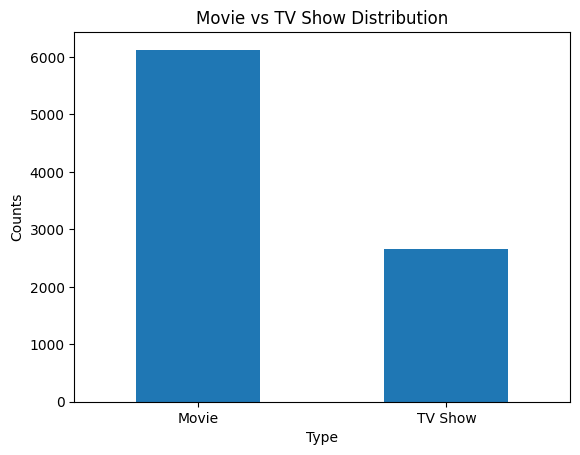

In [140]:
# Movie vs. TV Show Distribution: 

type_counts = data['type'].value_counts()

type_counts.plot(kind='bar', rot=0)
plt.xlabel("Type")
plt.ylabel("Counts")
plt.title("Movie vs TV Show Distribution")
plt.show()

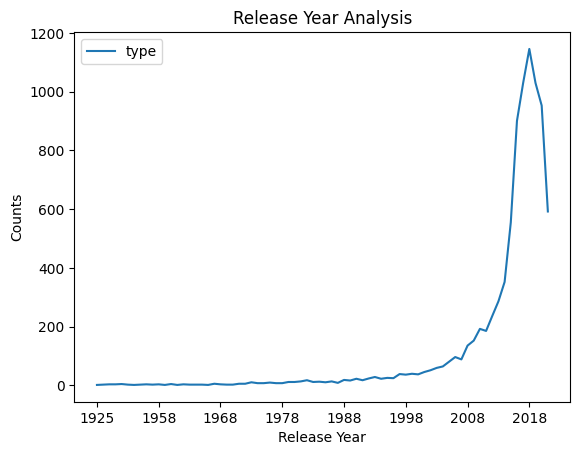

In [157]:
# Release Year Analysis

release_year = data.groupby('release_year').agg({'type':'count'})

release_year.plot()
plt.xlabel("Release Year")
plt.ylabel("Counts")
plt.title("Release Year Analysis")
plt.show()

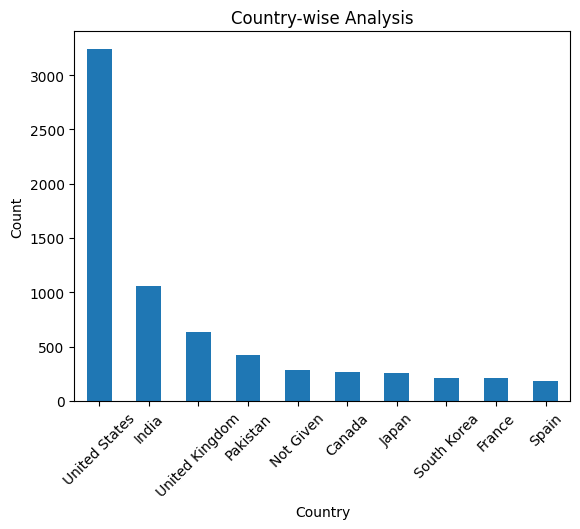

In [163]:
# Country-wiese Analysis
country_counts = data['country'].value_counts()

# Plot a bar chart to visualize the distribution
country_counts[:10].plot(kind='bar', rot=45)
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Country-wise Analysis")
plt.show()

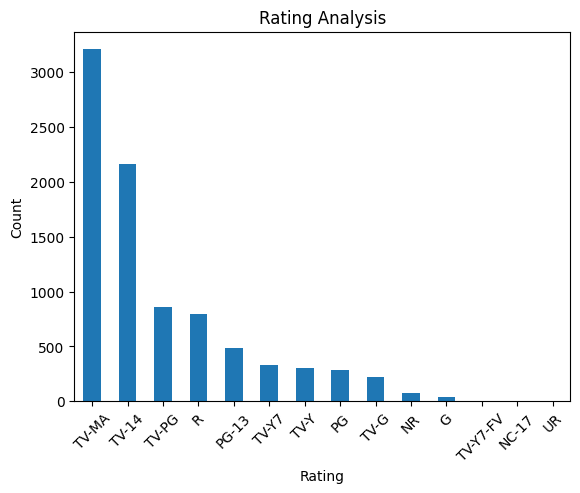

In [166]:
# Rating Analysis

rating_counts = data['rating'].value_counts()

# Plot a bar chart to visualize the distribution
rating_counts[:15].plot(kind='bar', rot=45)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Rating Analysis")
plt.show()

count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: formatted_duration, dtype: float64


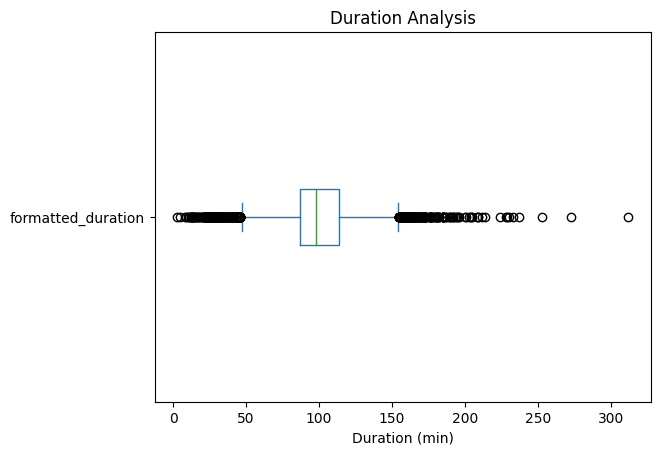

In [174]:
# Duration Analysis

# Calculate statistics on duration
duration_stats = data[data['type'] == 'Movie']['formatted_duration'].describe()
print(duration_stats)

# Plot a box plot to visualize the distribution
data[data['type'] == 'Movie']['formatted_duration'].plot(kind='box', vert=False)
plt.xlabel("Duration (min)")
plt.title("Duration Analysis")
plt.show()

In [188]:
# Calculate statistics on duration
duration_stats = data[data['type'] == 'Movie']['formatted_duration'].describe()
print(duration_stats)

# Calculate the IQR
Q1 = duration_stats['25%']
Q3 = duration_stats['75%']
IQR = Q3 - Q1

# Filter the records that fall outside the IQR
outliers = data[(data['type'] == 'Movie') & ((data['formatted_duration'] < Q1 - 1.5*IQR) | (data['formatted_duration'] > Q3 + 1.5*IQR))]
num_outliers = len(outliers)
print("Number of outliers: ", num_outliers)

in_iqr = data[(data['type'] == 'Movie') & ((data['formatted_duration'] >= Q1 - 1.5*IQR) | (data['formatted_duration'] <= Q3 + 1.5*IQR))]
num_in_iqr = len(in_iqr)
print("Number of in_iqr: ", num_in_iqr)



#outliers = data[(data['type'] == 'Movie') & ((data['duration'] < Q1 - 1.5 * IQR) | (data['duration'] > Q3 + 1.5 * IQR))]
#in_iqr = data[(data['type'] == 'Movie') & ((data['duration'] >= Q1 - 1.5 * IQR) & (data['duration'] <= Q3 + 1.5 * IQR))]


count    6126.000000
mean       99.584884
std        28.283225
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: formatted_duration, dtype: float64
Number of outliers:  449
Number of in_iqr:  6126
Number of in_iqr:  8790


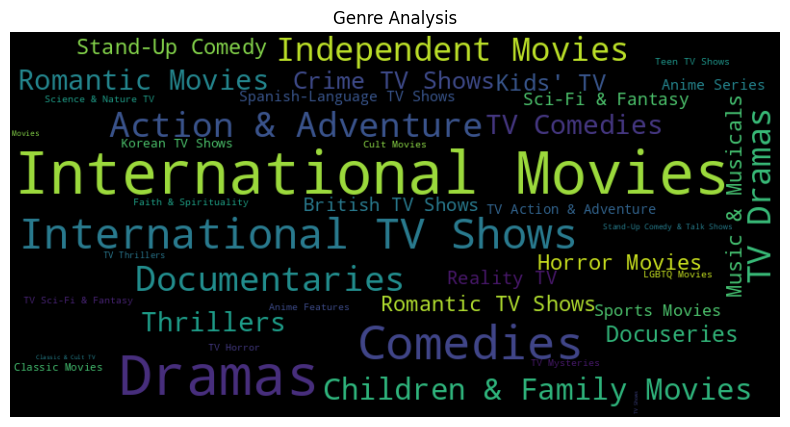

In [189]:
# Split the genres into individual genres and count the occurrences of each genre
genre_counts = data['listed_in'].str.split(', ').explode().value_counts()

# Plot a word cloud to visualize the distribution
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, max_words=100).generate_from_frequencies(genre_counts)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Genre Analysis")
plt.show()

In [212]:
data.listed_in.explode().value_counts()

data_listed = data.listed_in
print(data_listed.value_counts())

data_exploded = data.listed_in.str.split(", ").explode()
print(data_exploded.value_counts())

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: listed_in, Length: 513, dtype: int64
International Movies            2752
Dramas                          2426
Comedies                        1674
International TV Shows          1349
Documentaries                    869
Action & Adventure               859
TV Dramas                      